In [87]:
import mysql.connector
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

## Connect
Connect the MYSQL Database.

In [88]:
analytics_db_connection = mysql.connector.connect(
  host="localhost",
  user="",
  password="",
  database="recruitment_analytics"
)

## Queries
Count all applications by region and country.

In [89]:
# The MySQLCursor class instantiates objects that can execute operations such as SQL statements. 
# Cursor objects interact with the MySQL server using a MySQLConnection object.
cursor = analytics_db_connection.cursor()

query_1 = """

SELECT 
    c.name AS country_name, 
    r.name AS region_name, 
    COUNT(*) AS application_count
FROM 
    recruitment_analytics.application AS a
    JOIN recruitment_analytics.site AS s ON a.site_id = s.site_id
    JOIN recruitment_analytics.region AS r ON s.region_id = r.region_id
    JOIN recruitment_analytics.country AS c ON r.country_id = c.country_id
GROUP BY 
    c.name, r.name;

LIMIT 100
"""

cursor.execute(query_1)

result_1 = cursor.fetchall()
df_1 = DataFrame(result_1, columns=[desc[0] for desc in cursor.description])

df_1

,country_name,region_name,application_count
0,United States,California,1
1,United Kingdom,London,1
2,Canada,Ontario,1
3,Australia,New South Wales,2


Reconnect to the Database:

In [90]:
cursor.close()
analytics_db_connection.reconnect()
cursor = analytics_db_connection.cursor()

Count all applications by job group:

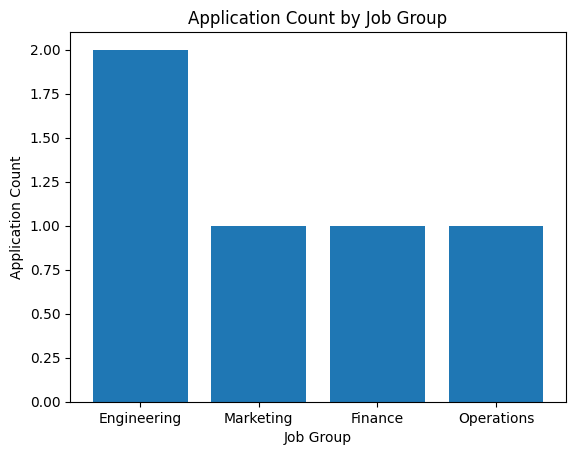

In [91]:
query_2 = """
SELECT 
    j.name AS job_group, 
    COUNT(*) AS application_count
FROM 
    recruitment_analytics.application AS a
    JOIN recruitment_analytics.vacancy AS v ON a.vacancy_id = v.vacancy_id
    JOIN recruitment_analytics.advertisement AS ad ON v.advertisement_id = ad.advertisement_id
    JOIN recruitment_analytics.job_group AS j ON ad.job_group_id = j.job_group_id
GROUP BY 
    j.name;
LIMIT 100
"""
cursor.execute(query_2)

result_2 = cursor.fetchall()
df_2 = DataFrame(result_2, columns=[desc[0] for desc in cursor.description])

# Create a bar plot
plt.bar(df_2['job_group'], df_2['application_count'])

# Set plot title and labels
plt.title('Application Count by Job Group')
plt.xlabel('Job Group')
plt.ylabel('Application Count')

# Display the plot
plt.show()